In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split


In [2]:
path = r"C:\DATASETS\Breast Cancer Wisconsin (Diagnostic) Data Set\data.csv"
df = read_csv(path)

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df=df.drop(["id","Unnamed: 32"], axis=1)

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
target_y=df["diagnosis"]
features_x=df.drop("diagnosis", axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(target_y)
target_encoded = encoder.transform(target_y)
target_encoded=pd.get_dummies(target_encoded,drop_first=True)

In [9]:
#Encoded target
y=target_encoded.values

Text(0.5, 1.0, 'Breast Cancer')

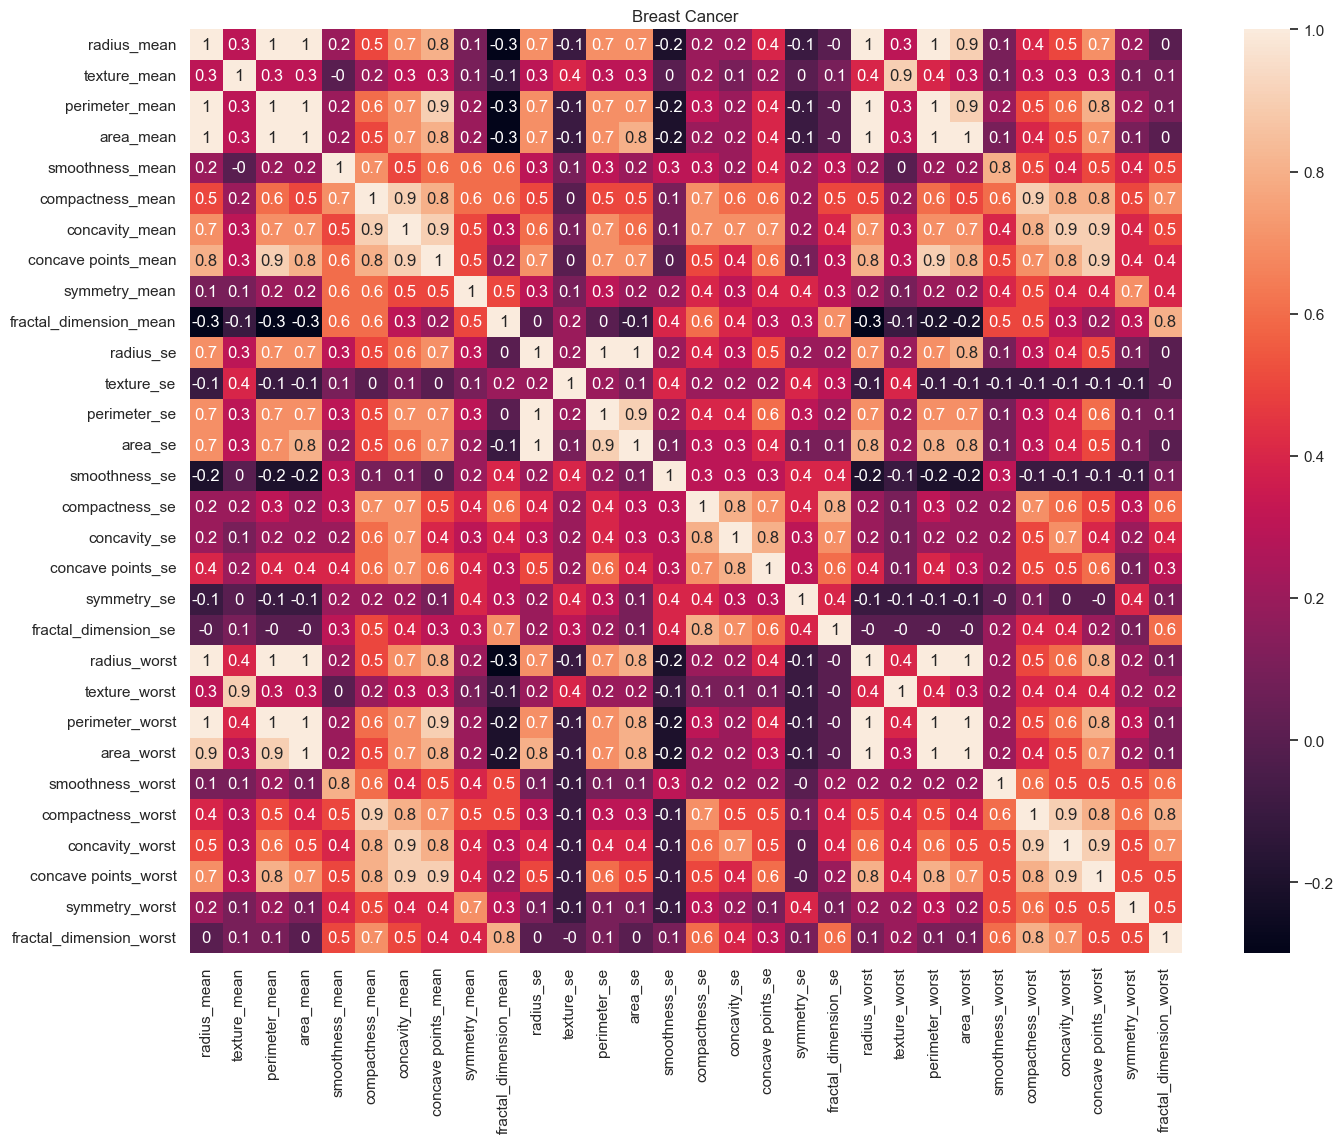

In [10]:
correlations = features_x.corr().round(1)
plt.figure(figsize=(16,12))
plot=sns.heatmap(correlations,annot=True)
plot.set_title("Breast Cancer")

In [11]:
# from the heatmap correlation:
#'radius_mean',  'perimeter_mean' and 'area_mean' are higly correlated 
#'perimeter_worst', 'area_worst' and 'radius_worst' are higly correlated 
#'radius_se','area_se' and 'perimeter_se' are higly correlated 
#thus only one from each group will be used in training the model

In [12]:
features_array =features_x.values

The accuracy is:  0.951048951048951
The precision is:  0.9622641509433962
The recall is:  0.9107142857142857
The f1_score is:  0.9357798165137615
The roc is:  0.9438628899835796


<AxesSubplot:>

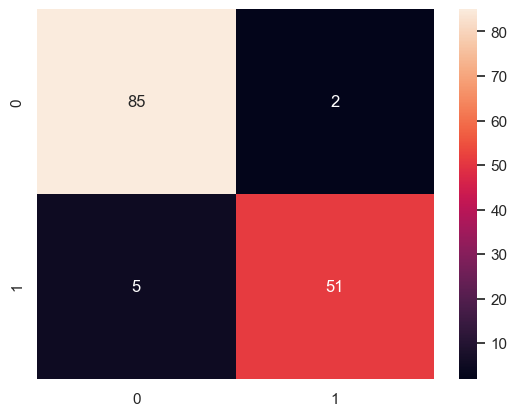

In [13]:
x_train,x_test,y_train,y_test=train_test_split(features_array,y,test_size=0.25,random_state=100)
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train,y_train)
y_predictions=rfc.predict(x_test)

accuracy=accuracy_score(y_test,y_predictions)
recall=recall_score(y_test, y_predictions)
f1=f1_score(y_test, y_predictions)
roc=roc_auc_score(y_test, y_predictions)
loss=log_loss(y_test, y_predictions)
report=classification_report(y_test, y_predictions)
confusion = confusion_matrix(y_test, y_predictions)
precision=precision_score(y_test, y_predictions)

print("The accuracy is: ",accuracy)
print("The precision is: ",precision)
print("The recall is: ",recall)
print("The f1_score is: ",f1)
print("The roc is: ",roc)
#print("The loss is: ",loss)
#print("The report is: ",report)
#print("The confusion_matrix is: ",confusion)



sns.heatmap(confusion,annot=True,fmt="g")

In [14]:
minmax = MinMaxScaler(feature_range=(0,1))
x_train_minmax= minmax.fit_transform(x_train)
x_test_minmax= minmax.transform(x_test)
 

Data_normalizer = Normalizer(norm='l1')
x_train_l1= Data_normalizer.fit_transform(x_train)
x_test_l1= Data_normalizer.transform(x_test)


Data_normalizer2 = Normalizer(norm='l2')
x_train_l2= Data_normalizer2.fit_transform(x_train)
x_test_l2= Data_normalizer2.transform(x_test)

data_scaler = StandardScaler()
x_train_scaler= Data_normalizer.fit_transform(x_train)
x_test_scaler= Data_normalizer.transform(x_test)



The accuracy is:  0.951048951048951
The precision is:  0.9622641509433962
The recall is:  0.9107142857142857
The f1_score is:  0.9357798165137615
The roc is:  0.9438628899835796


<AxesSubplot:>

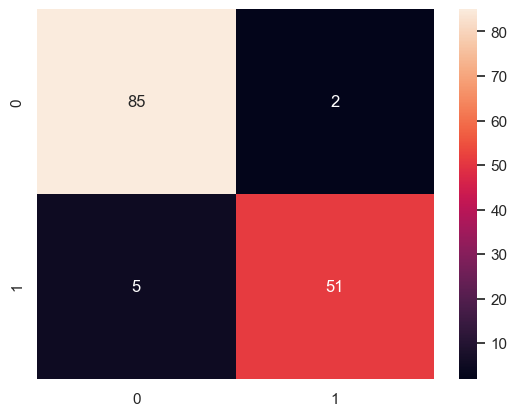

In [15]:
rfc.fit(x_train_minmax,y_train)
y_predictions=rfc.predict(x_test_minmax)

accuracy=accuracy_score(y_test,y_predictions)
recall=recall_score(y_test, y_predictions)
f1=f1_score(y_test, y_predictions)
roc=roc_auc_score(y_test, y_predictions)
loss=log_loss(y_test, y_predictions)
report=classification_report(y_test, y_predictions)
confusion = confusion_matrix(y_test, y_predictions)
precision=precision_score(y_test, y_predictions)

print("The accuracy is: ",accuracy)
print("The precision is: ",precision)
print("The recall is: ",recall)
print("The f1_score is: ",f1)
print("The roc is: ",roc)
#print("The loss is: ",loss)
#print("The report is: ",report)
#print("The confusion_matrix is: ",confusion)



sns.heatmap(confusion,annot=True,fmt="g")

The accuracy is:  0.9790209790209791
The precision is:  0.9818181818181818
The recall is:  0.9642857142857143
The f1_score is:  0.972972972972973
The roc is:  0.9763957307060757


<AxesSubplot:>

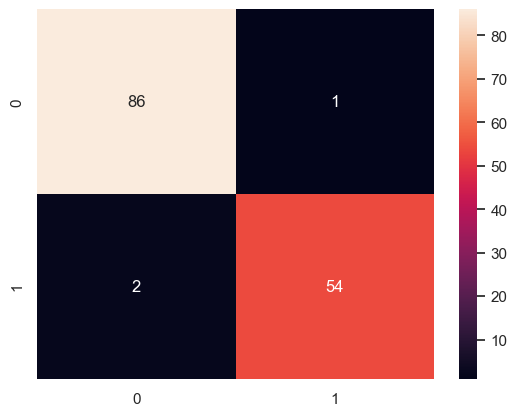

In [16]:
rfc.fit(x_train_l1,y_train)
y_predictions=rfc.predict(x_test_l1)

accuracy=accuracy_score(y_test,y_predictions)
recall=recall_score(y_test, y_predictions)
f1=f1_score(y_test, y_predictions)
roc=roc_auc_score(y_test, y_predictions)
loss=log_loss(y_test, y_predictions)
report=classification_report(y_test, y_predictions)
confusion = confusion_matrix(y_test, y_predictions)
precision=precision_score(y_test, y_predictions)

print("The accuracy is: ",accuracy)
print("The precision is: ",precision)
print("The recall is: ",recall)
print("The f1_score is: ",f1)
print("The roc is: ",roc)
#print("The loss is: ",loss)
#print("The report is: ",report)
#print("The confusion_matrix is: ",confusion)



sns.heatmap(confusion,annot=True,fmt="g")

The accuracy is:  0.965034965034965
The precision is:  0.9473684210526315
The recall is:  0.9642857142857143
The f1_score is:  0.9557522123893805
The roc is:  0.9649014778325125


<AxesSubplot:>

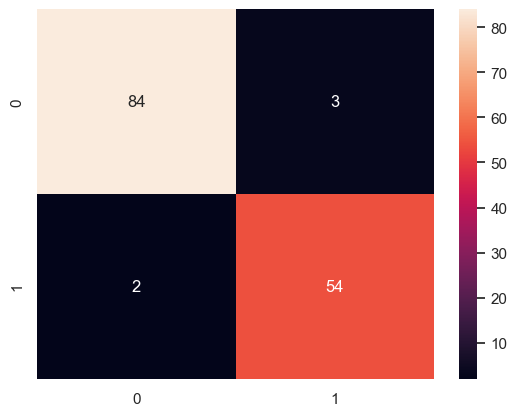

In [17]:
rfc.fit(x_train_l2,y_train)
y_predictions=rfc.predict(x_test_l2)

accuracy=accuracy_score(y_test,y_predictions)
recall=recall_score(y_test, y_predictions)
f1=f1_score(y_test, y_predictions)
roc=roc_auc_score(y_test, y_predictions)
loss=log_loss(y_test, y_predictions)
report=classification_report(y_test, y_predictions)
confusion = confusion_matrix(y_test, y_predictions)
precision=precision_score(y_test, y_predictions)

print("The accuracy is: ",accuracy)
print("The precision is: ",precision)
print("The recall is: ",recall)
print("The f1_score is: ",f1)
print("The roc is: ",roc)
#print("The loss is: ",loss)
#print("The report is: ",report)
#print("The confusion_matrix is: ",confusion)



sns.heatmap(confusion,annot=True,fmt="g")

The accuracy is:  0.965034965034965
The precision is:  0.9636363636363636
The recall is:  0.9464285714285714
The f1_score is:  0.9549549549549549
The roc is:  0.9617200328407225


<AxesSubplot:>

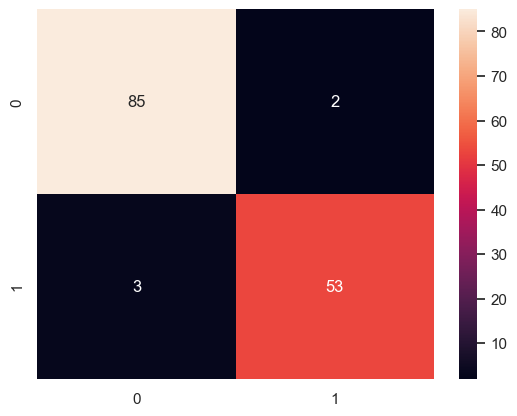

In [18]:
rfc.fit(x_train_scaler,y_train)
y_predictions=rfc.predict(x_test_scaler)

accuracy=accuracy_score(y_test,y_predictions)
recall=recall_score(y_test, y_predictions)
f1=f1_score(y_test, y_predictions)
roc=roc_auc_score(y_test, y_predictions)
loss=log_loss(y_test, y_predictions)
report=classification_report(y_test, y_predictions)
confusion = confusion_matrix(y_test, y_predictions)
precision=precision_score(y_test, y_predictions)

print("The accuracy is: ",accuracy)
print("The precision is: ",precision)
print("The recall is: ",recall)
print("The f1_score is: ",f1)
print("The roc is: ",roc)
#print("The loss is: ",loss)
#print("The report is: ",report)
#print("The confusion_matrix is: ",confusion)



sns.heatmap(confusion,annot=True,fmt="g")